In [36]:
!pip install pycaret shap --quiet

In [22]:
from pycaret.classification import *
from pycaret.datasets import get_data

## Loading Data

In [23]:
diabetes = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
exp_clf = setup(diabetes, target='Class variable')
# or
# experiment = setup(df, target='target', categorical_features=cat_features)

,Description,Value
0,session_id,6975
1,Target,Class variable
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


This resulting DataFrame is quite long and reports back a lot of information about your data. We can now proceed with the machine learning portion.

## Finding the optimal algorithm

In [25]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7766,0.0000,0.5485,0.7254,0.6194,0.4673,0.4792,0.023
lr,Logistic Regression,0.7709,0.8209,0.5538,0.7042,0.6154,0.4571,0.4662,0.433
knn,K Neighbors Classifier,0.7673,0.7606,0.5713,0.6918,0.6209,0.4565,0.4640,0.128
lda,Linear Discriminant Analysis,0.7635,0.8141,0.5485,0.6925,0.6064,0.4421,0.4516,0.024
rf,Random Forest Classifier,0.7615,0.8042,0.5158,0.6983,0.5919,0.4296,0.4400,0.556
lightgbm,Light Gradient Boosting Machine,0.7448,0.7897,0.5553,0.6490,0.5927,0.4100,0.4167,0.063
et,Extra Trees Classifier,0.7393,0.7865,0.4605,0.6693,0.5432,0.3699,0.3838,0.507
gbc,Gradient Boosting Classifier,0.7374,0.8036,0.5319,0.6387,0.5773,0.3898,0.3953,0.182
ada,Ada Boost Classifier,0.7319,0.7643,0.5161,0.6309,0.5655,0.3750,0.3804,0.147
nb,Naive Bayes,0.6780,0.7239,0.2360,0.5566,0.3226,0.1611,0.1870,0.019


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=6975,
                solver='auto', tol=0.001)

In [26]:
ada = create_model('ada')
# or
# best_model = compare_models()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7593,0.8102,0.5000,0.6923,0.5806,0.4179,0.4288
1,0.7037,0.8071,0.5556,0.5556,0.5556,0.3333,0.3333
2,0.6296,0.7052,0.4444,0.4444,0.4444,0.1667,0.1667
3,0.7407,0.7546,0.5000,0.6429,0.5625,0.3824,0.3884
4,0.6852,0.6512,0.4444,0.5333,0.4848,0.2609,0.2631
5,0.8519,0.8617,0.6842,0.8667,0.7647,0.6588,0.6686
6,0.7037,0.7128,0.4211,0.6154,0.5000,0.2998,0.3107
7,0.6792,0.7222,0.3889,0.5385,0.4516,0.2332,0.2394
8,0.7736,0.8135,0.5556,0.7143,0.6250,0.4664,0.4740


## Visualizing models performance

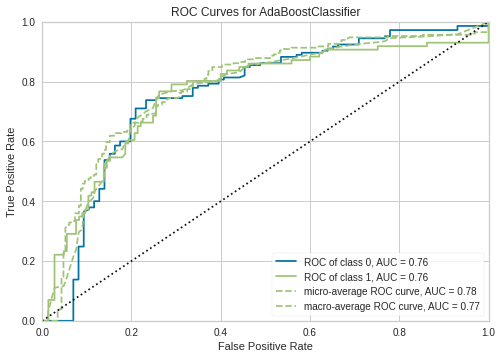

In [27]:
plot_model(ada) # shows the ROC curves plot by default

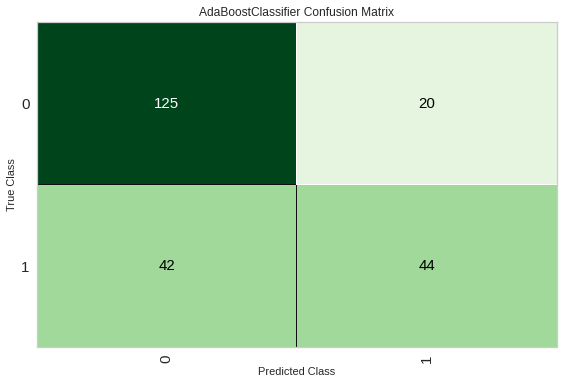

In [28]:
plot_model(ada, 'confusion_matrix')

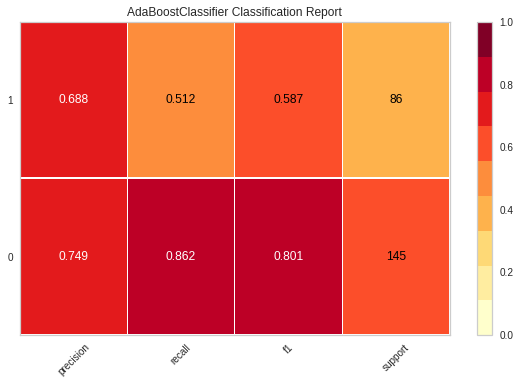

In [29]:
plot_model(ada, 'class_report') # classification report

## Model interpretation with SHAP

SHAP, or SHapley Additive exPlanations, is a way to explain the outputs of a machine learning model. We can use it to see which features are most important by plotting the SHAP values of every feature for every sample.

In [30]:
# interpret_model(ada)

TypeError: ignored

## Model evaluation and predictions

PyCaret split the data into training and test portions (70:30) upon loading, so we don’t have to do it manually.\
We can now evaluate the model on previously unseen data:

In [31]:
predictions = predict_model(ada)
# or
# predict_model(best_model, df.tail())

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.7316,0.7611,0.5116,0.6875,0.5867,0.3942,0.4036


## Model saving and loading

Before saving the model, we need to finalize it:

In [32]:
finalize_model(ada)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=6975)

In [33]:
save_model(ada, 'diabetes_ada')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Class variable',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeri...
                 ('dummy', Dummify(target='Class variable')),
                 ('fix_perfect', Remove_100(target='Class variable')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrou

In [34]:
model = load_model('diabetes_ada')

Transformation Pipeline and Model Successfully Loaded


In [35]:
model

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Class variable',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeri...
                ('dummy', Dummify(target='Class variable')),
                ('fix_perfect', Remove_100(target='Class variable')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi'

In [37]:
model.predict(diabetes.tail())

array([0, 0, 0, 1, 0])